<a href="https://colab.research.google.com/github/PanavShah1/Summer_of_Science_Image_Processing/blob/main/2_Object_Detection/Pascal_VOC_Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from PIL import Image
import random

In [2]:
train_database = torchvision.datasets.VOCDetection(
    root='/content',
    year='2012',
    image_set='train',
    download=True,
)

100%|██████████| 1999639040/1999639040 [00:50<00:00, 39301950.56it/s]


Extracting /content/VOCtrainval_11-May-2012.tar to /content


In [74]:
classes_set = set()

# Iterate through the dataset annotations
for idx in range(len(train_database)):
    # Retrieve objects and their annotations
    objects = train_database[idx][1]['annotation']['object']

    # Extract class names and add them to the set
    for obj in objects:
        class_name = obj['name']
        classes_set.add(class_name)

# Convert the set of class names to a sorted list for clarity
classes_list = sorted(list(classes_set))

# Print the classes
print("Classes in Pascal VOC dataset:")
for idx, class_name in enumerate(classes_list):
    print(f"{idx + 1}. {class_name}")

Classes in Pascal VOC dataset:
1. aeroplane
2. bicycle
3. bird
4. boat
5. bottle
6. bus
7. car
8. cat
9. chair
10. cow
11. diningtable
12. dog
13. horse
14. motorbike
15. person
16. pottedplant
17. sheep
18. sofa
19. train
20. tvmonitor


In [75]:
object_number = {}
for idx, class_name in enumerate(classes_list):
    object_number[class_name] = idx

object_number

{'aeroplane': 0,
 'bicycle': 1,
 'bird': 2,
 'boat': 3,
 'bottle': 4,
 'bus': 5,
 'car': 6,
 'cat': 7,
 'chair': 8,
 'cow': 9,
 'diningtable': 10,
 'dog': 11,
 'horse': 12,
 'motorbike': 13,
 'person': 14,
 'pottedplant': 15,
 'sheep': 16,
 'sofa': 17,
 'train': 18,
 'tvmonitor': 19}

In [76]:
class ScaleTo255:
  def __call__(self, sample):
    return (sample * 255).to(torch.uint8)

In [77]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((224, 224)),
    # ScaleTo255()
])

In [78]:
transform_without_resize = transforms.Compose([
    transforms.ToTensor(),
    ScaleTo255()
])

In [79]:
len(train_database)

5717

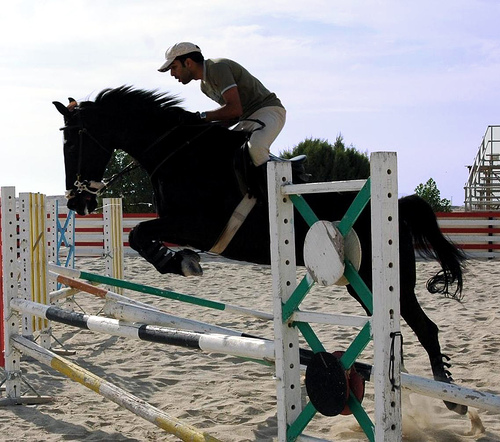

In [80]:
train_database[0][0]

In [81]:
transform(train_database[0][0])

tensor([[[1.0000, 1.0000, 1.0000,  ..., 0.7981, 0.7961, 0.7969],
         [1.0000, 1.0000, 1.0000,  ..., 0.8048, 0.8060, 0.8076],
         [1.0000, 1.0000, 1.0000,  ..., 0.8101, 0.8133, 0.8201],
         ...,
         [0.6602, 0.7023, 0.6558,  ..., 0.4481, 0.4342, 0.4721],
         [0.7280, 0.7471, 0.7021,  ..., 0.4499, 0.4581, 0.4533],
         [0.7383, 0.7440, 0.5945,  ..., 0.3780, 0.3830, 0.3889]],

        [[1.0000, 1.0000, 1.0000,  ..., 0.8098, 0.8078, 0.8087],
         [1.0000, 1.0000, 1.0000,  ..., 0.8184, 0.8186, 0.8209],
         [1.0000, 1.0000, 1.0000,  ..., 0.8257, 0.8286, 0.8357],
         ...,
         [0.6102, 0.6523, 0.6062,  ..., 0.4089, 0.3961, 0.4305],
         [0.6731, 0.6922, 0.6483,  ..., 0.4193, 0.4260, 0.4232],
         [0.6834, 0.6891, 0.5404,  ..., 0.3571, 0.3618, 0.3705]],

        [[1.0000, 1.0000, 1.0000,  ..., 0.9710, 0.9760, 0.9773],
         [1.0000, 1.0000, 1.0000,  ..., 0.9738, 0.9800, 0.9806],
         [1.0000, 1.0000, 1.0000,  ..., 0.9746, 0.9740, 0.

(3, 224, 224)
(224, 224, 3)
[[[254.99998  254.99998  254.99998 ]
  [255.       255.       255.      ]
  [254.99998  254.99998  254.99998 ]
  ...
  [203.51033  206.51033  247.59569 ]
  [202.996    205.99602  248.88853 ]
  [203.21364  206.21365  249.21365 ]]

 [[254.99998  254.99998  254.99998 ]
  [255.       255.       255.      ]
  [254.99998  254.99998  254.99998 ]
  ...
  [205.23029  208.69864  248.32921 ]
  [205.52858  208.75336  249.90312 ]
  [205.93472  209.34167  250.05084 ]]

 [[254.99998  254.99998  254.99998 ]
  [255.       255.       255.      ]
  [254.99998  254.99998  254.99998 ]
  ...
  [206.56964  210.5655   248.53062 ]
  [207.39847  211.30247  248.37366 ]
  [209.12271  213.09543  249.5936  ]]

 ...

 [[168.34552  155.58981  141.81113 ]
  [179.09521  166.3395   152.60916 ]
  [167.2323   154.59201  140.95808 ]
  ...
  [114.25781  104.27628   94.94428 ]
  [110.710464 101.00067   90.07663 ]
  [120.38818  109.78764   96.36511 ]]

 [[185.64233  171.64232  158.64232 ]
  [190.50

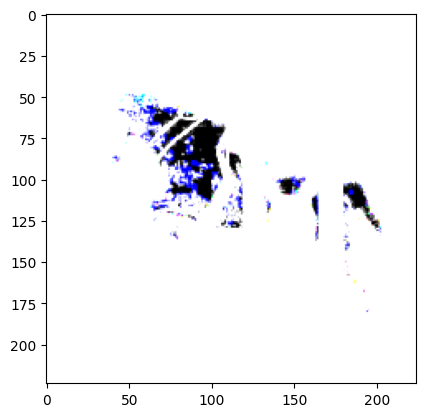

In [82]:
img = transform(train_database[0][0]).numpy()

img = img *255

img_permuted = transform(train_database[0][0]).permute(1, 2, 0).numpy()

img_permuted = img_permuted * 255

print(img.shape)
print(img_permuted.shape)

print(img_permuted)
plt.imshow(img_permuted)


In [83]:
cv2.imwrite("test_img.png", img_permuted)

True

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [204, 207, 248],
        [203, 206, 249],
        [203, 206, 249]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [205, 209, 248],
        [206, 209, 250],
        [206, 209, 250]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [207, 211, 249],
        [207, 211, 248],
        [209, 213, 250]],

       ...,

       [[168, 156, 142],
        [179, 166, 153],
        [167, 155, 141],
        ...,
        [114, 104,  95],
        [111, 101,  90],
        [120, 110,  96]],

       [[186, 172, 159],
        [191, 177, 164],
        [179, 165, 152],
        ...,
        [115, 107, 101],
        [117, 109, 101],
        [116, 108,  97]],

       [[188, 174, 161],
        [190, 176, 163],
        [152, 138, 125],
        ...,
        [ 96,  91,  88],
        [ 98,  92,  87],
        [ 99,  94,  88]]], dtype=uint8)
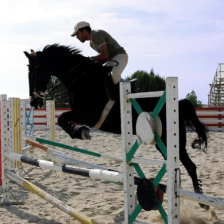

In [84]:
igg = cv2.imread("test_img.png")
igg

In [85]:
data = train_database[0][1]
size = transform_without_resize(train_database[0][0]).shape
data, size

({'annotation': {'folder': 'VOC2012',
   'filename': '2008_000008.jpg',
   'source': {'database': 'The VOC2008 Database',
    'annotation': 'PASCAL VOC2008',
    'image': 'flickr'},
   'size': {'width': '500', 'height': '442', 'depth': '3'},
   'segmented': '0',
   'object': [{'name': 'horse',
     'pose': 'Left',
     'truncated': '0',
     'occluded': '1',
     'bndbox': {'xmin': '53', 'ymin': '87', 'xmax': '471', 'ymax': '420'},
     'difficult': '0'},
    {'name': 'person',
     'pose': 'Unspecified',
     'truncated': '1',
     'occluded': '0',
     'bndbox': {'xmin': '158', 'ymin': '44', 'xmax': '289', 'ymax': '167'},
     'difficult': '0'}]}},
 torch.Size([3, 442, 500]))

In [86]:
data.keys()

dict_keys(['annotation'])

In [87]:
data['annotation']

{'folder': 'VOC2012',
 'filename': '2008_000008.jpg',
 'source': {'database': 'The VOC2008 Database',
  'annotation': 'PASCAL VOC2008',
  'image': 'flickr'},
 'size': {'width': '500', 'height': '442', 'depth': '3'},
 'segmented': '0',
 'object': [{'name': 'horse',
   'pose': 'Left',
   'truncated': '0',
   'occluded': '1',
   'bndbox': {'xmin': '53', 'ymin': '87', 'xmax': '471', 'ymax': '420'},
   'difficult': '0'},
  {'name': 'person',
   'pose': 'Unspecified',
   'truncated': '1',
   'occluded': '0',
   'bndbox': {'xmin': '158', 'ymin': '44', 'xmax': '289', 'ymax': '167'},
   'difficult': '0'}]}

In [88]:
data['annotation'].keys()

dict_keys(['folder', 'filename', 'source', 'size', 'segmented', 'object'])

In [89]:
data['annotation']['object']

[{'name': 'horse',
  'pose': 'Left',
  'truncated': '0',
  'occluded': '1',
  'bndbox': {'xmin': '53', 'ymin': '87', 'xmax': '471', 'ymax': '420'},
  'difficult': '0'},
 {'name': 'person',
  'pose': 'Unspecified',
  'truncated': '1',
  'occluded': '0',
  'bndbox': {'xmin': '158', 'ymin': '44', 'xmax': '289', 'ymax': '167'},
  'difficult': '0'}]

442 500
0 23 44 211 212
442 500
1 70 22 129 84


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [204, 207, 248],
        [203, 206, 249],
        [203, 206, 249]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [205, 209, 248],
        [206, 209, 250],
        [206, 209, 250]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [207, 211, 249],
        [207, 211, 248],
        [209, 213, 250]],

       ...,

       [[168, 156, 142],
        [179, 166, 153],
        [167, 155, 141],
        ...,
        [114, 104,  95],
        [111, 101,  90],
        [120, 110,  96]],

       [[186, 172, 159],
        [191, 177, 164],
        [179, 165, 152],
        ...,
        [115, 107, 101],
        [117, 109, 101],
        [116, 108,  97]],

       [[188, 174, 161],
        [190, 176, 163],
        [152, 138, 125],
        ...,
        [ 96,  91,  88],
        [ 98,  92,  87],
        [ 99,  94,  88]]], dtype=uint8)
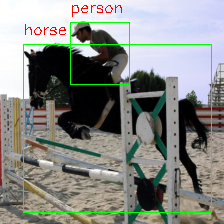

In [90]:
for i, o in enumerate(data['annotation']['object']):
  print(size[1], size[2])
  x1 = int(int(o['bndbox']['xmin'])*224/size[2])
  y1 = int(int(o['bndbox']['ymin'])*224/size[1])
  x2 = int(int(o['bndbox']['xmax'])*224/size[2])
  y2 = int(int(o['bndbox']['ymax'])*224/size[1])
  print(i, x1, y1, x2, y2)
  cv2.rectangle(igg, (x1, y1), (x2, y2), (0, 255, 0), 1)
  cv2.putText(igg, o['name'], (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

igg

## Examine data

In [91]:
image_index = random.sample(range(0, len(train_database)), 9)
image_index

[92, 3053, 4980, 1193, 1495, 4922, 3895, 1478, 1789]

500 333
500 334
500 378
500 375
500 375
377 500
500 375
500 490
500 326


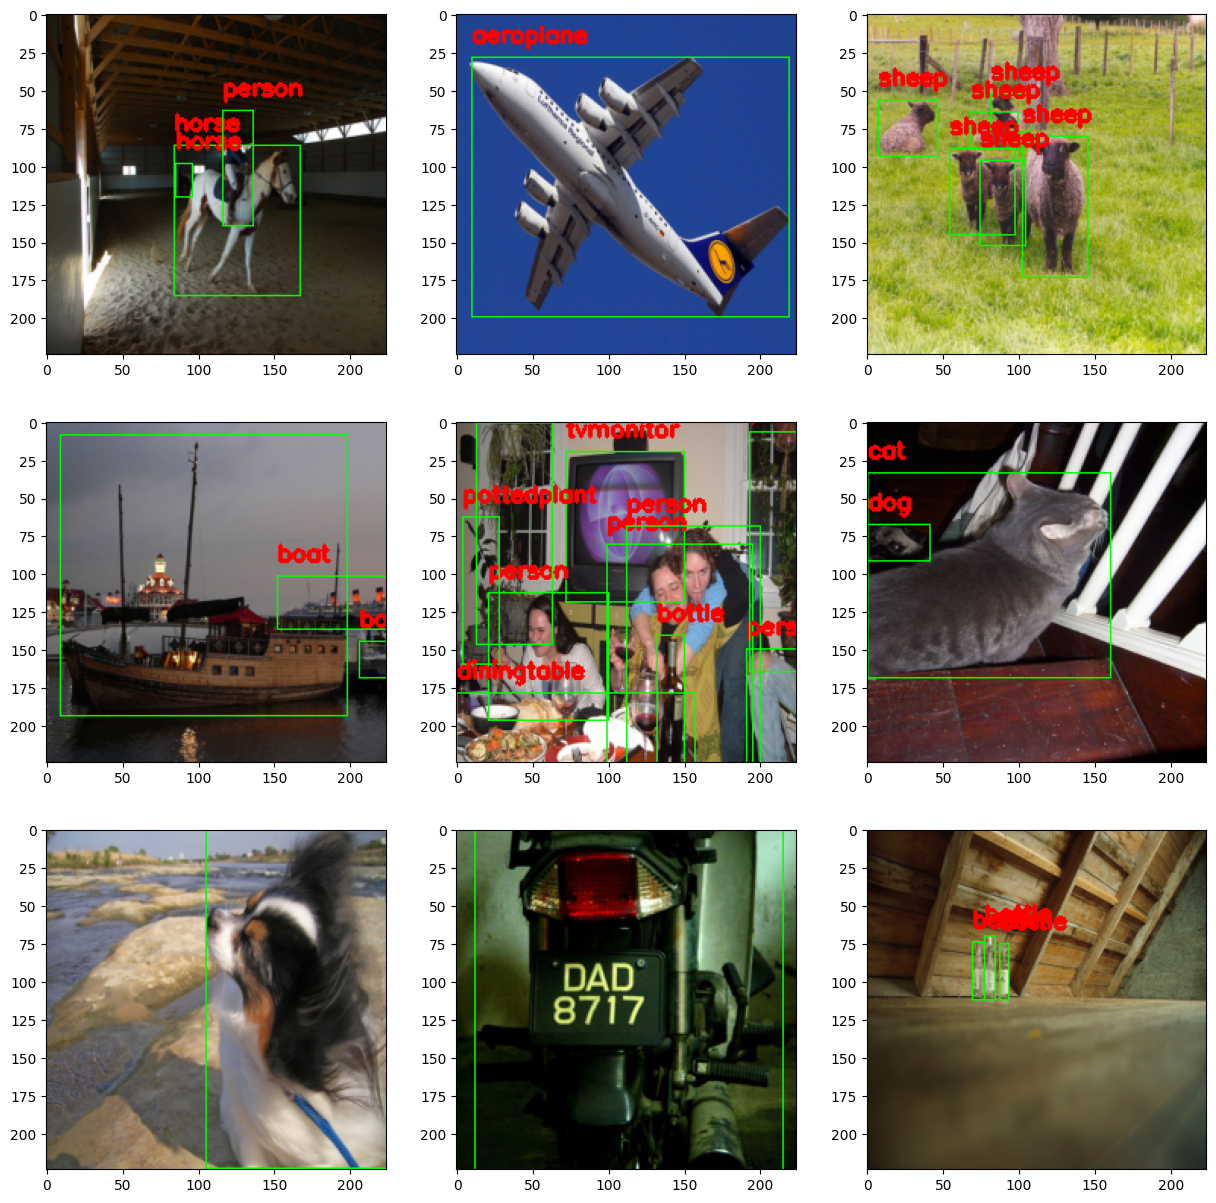

In [92]:
fig = plt.figure(figsize=(15, 15))
columns = 3
rows = 3
for n, i in enumerate(image_index):

  datum = train_database[i]
  img = transform(datum[0]).numpy()
  img = img * 255
  img_permuted = transform(datum[0]).permute(1, 2, 0).numpy()
  img_permuted = img_permuted * 255

  cv2.imwrite(f"test_img_{n}.png", img_permuted)
  igg = cv2.imread(f"test_img_{n}.png")
  object_dict = datum[1]
  x_max = transform_without_resize(datum[0]).shape[2]
  y_max = transform_without_resize(datum[0]).shape[1]
  print(x_max, y_max)

  objects = object_dict['annotation']['object']


  for i, o in enumerate(objects):
    x1 = int(o['bndbox']['xmin']) * 224 // x_max
    y1 = int(o['bndbox']['ymin']) * 224 // y_max
    x2 = int(o['bndbox']['xmax']) * 224 // x_max
    y2 = int(o['bndbox']['ymax']) * 224 // y_max
    cv2.rectangle(igg, (x1, y1), (x2, y2), (0, 255, 0), 1)
    cv2.putText(igg, o['name'], (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

  plt.subplot(rows, columns, n+1)
  plt.imshow(igg)


In [93]:
from torch.utils.data import Dataset

class PascalVOCDataset(Dataset):
    def __init__(self, database, transform=None):
        super().__init__()
        self.database = database
        self.transform = transform

    def __len__(self):
        return len(self.database)

    def __getitem__(self, idx):
        img, target = self.database[idx]
        img_temp = transform_without_resize(img)
        x_max = img_temp.shape[2]
        y_max = img_temp.shape[1]

        objects = target['annotation']['object']
        object_list = []

        for i, o in enumerate(objects):
            x1 = int(o['bndbox']['xmin']) * 224 // x_max
            y1 = int(o['bndbox']['ymin']) * 224 // y_max
            x2 = int(o['bndbox']['xmax']) * 224 // x_max
            y2 = int(o['bndbox']['ymax']) * 224 // y_max
            object_list.append((x1, y1, x2, y2, object_number[o['name']]))

        if self.transform:
            img = self.transform(img)

        return img, object_list


In [94]:
train_dataset = PascalVOCDataset(train_database, transform)
train_dataset

In [95]:
train_dataset[0]

(tensor([[[1.0000, 1.0000, 1.0000,  ..., 0.7981, 0.7961, 0.7969],
          [1.0000, 1.0000, 1.0000,  ..., 0.8048, 0.8060, 0.8076],
          [1.0000, 1.0000, 1.0000,  ..., 0.8101, 0.8133, 0.8201],
          ...,
          [0.6602, 0.7023, 0.6558,  ..., 0.4481, 0.4342, 0.4721],
          [0.7280, 0.7471, 0.7021,  ..., 0.4499, 0.4581, 0.4533],
          [0.7383, 0.7440, 0.5945,  ..., 0.3780, 0.3830, 0.3889]],
 
         [[1.0000, 1.0000, 1.0000,  ..., 0.8098, 0.8078, 0.8087],
          [1.0000, 1.0000, 1.0000,  ..., 0.8184, 0.8186, 0.8209],
          [1.0000, 1.0000, 1.0000,  ..., 0.8257, 0.8286, 0.8357],
          ...,
          [0.6102, 0.6523, 0.6062,  ..., 0.4089, 0.3961, 0.4305],
          [0.6731, 0.6922, 0.6483,  ..., 0.4193, 0.4260, 0.4232],
          [0.6834, 0.6891, 0.5404,  ..., 0.3571, 0.3618, 0.3705]],
 
         [[1.0000, 1.0000, 1.0000,  ..., 0.9710, 0.9760, 0.9773],
          [1.0000, 1.0000, 1.0000,  ..., 0.9738, 0.9800, 0.9806],
          [1.0000, 1.0000, 1.0000,  ...,

In [96]:
train_dataset[0][0].shape

torch.Size([3, 224, 224])

In [97]:
def collate_fn(batch):
    images = []
    targets = []

    for b in batch:
        images.append(b[0])
        targets.append(b[1])

    # Ensure all elements in targets have the same length by padding
    max_num_objects = max(len(t) for t in targets)

    for i in range(len(targets)):
        while len(targets[i]) < max_num_objects:
            targets[i].append((0, 0, 0, 0, -1))  # Append dummy bounding box

    return torch.stack(images, 0), targets

In [98]:
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True, collate_fn=collate_fn)
train_dataloader

In [113]:
temp_dataloader = next(iter(train_dataloader))
images, targets = temp_dataloader

In [114]:
targets[0]

[(110, 103, 137, 157, 13),
 (111, 87, 137, 145, 14),
 (105, 75, 114, 111, 14),
 (101, 77, 108, 111, 14),
 (58, 80, 64, 98, 14),
 (0, 0, 0, 0, -1),
 (0, 0, 0, 0, -1),
 (0, 0, 0, 0, -1),
 (0, 0, 0, 0, -1),
 (0, 0, 0, 0, -1),
 (0, 0, 0, 0, -1)]

In [115]:
converted_targets = []
for target in targets:
    target_dict = {'boxes': [], 'labels': []}
    for obj in target:
        if obj[4] == -1:  # Ignore padding
            continue
        x1, y1, x2, y2, label = obj
        target_dict['boxes'].append([x1, y1, x2, y2])
        target_dict['labels'].append(label)
    target_dict['boxes'] = torch.tensor(target_dict['boxes'], dtype=torch.float32)
    target_dict['labels'] = torch.tensor(target_dict['labels'], dtype=torch.int64)
    converted_targets.append(target_dict)

In [116]:
converted_targets

[{'boxes': tensor([[110., 103., 137., 157.],
          [111.,  87., 137., 145.],
          [105.,  75., 114., 111.],
          [101.,  77., 108., 111.],
          [ 58.,  80.,  64.,  98.]]),
  'labels': tensor([13, 14, 14, 14, 14])},
 {'boxes': tensor([[  0.,   0., 224., 224.]]), 'labels': tensor([13])},
 {'boxes': tensor([[ 67.,  32., 176., 192.],
          [ 14.,   0., 128., 201.],
          [ 75.,  26., 214., 222.],
          [  0.,  45.,  84., 224.]]),
  'labels': tensor([14, 14,  8,  8])},
 {'boxes': tensor([[ 16., 122., 181., 223.]]), 'labels': tensor([17])},
 {'boxes': tensor([[  7.,  13., 215., 216.]]), 'labels': tensor([7])},
 {'boxes': tensor([[118.,  95., 153., 130.],
          [ 85., 132., 128., 177.],
          [101., 109., 170., 134.]]),
  'labels': tensor([14, 14,  1])},
 {'boxes': tensor([[ 77., 156., 118., 196.],
          [  9., 150.,  68., 182.],
          [ 63., 134.,  99., 156.],
          [ 18., 138.,  64., 157.],
          [120., 118., 154., 136.],
          [190

In [109]:
model_0 = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model_0.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [118]:
model_0(images, converted_targets)

[{'boxes': tensor([[110.4276,  88.9751, 137.2698, 140.9952],
          [106.4089,  76.3796, 113.5533, 103.0000],
          [110.4459, 104.3993, 134.4819, 157.4843],
          [100.9688,  77.2725, 107.1998,  94.0915],
          [126.0172,  76.1610, 134.3415,  96.2230],
          [ 58.2272,  80.2549,  63.2768,  98.0156],
          [ 58.0123,  80.3994,  67.7761, 109.0342],
          [110.4016, 103.9871, 136.2626, 158.4554],
          [ 98.9912,  77.1097, 107.0698, 105.1187],
          [  3.1612, 137.4478,  43.6722, 218.4184],
          [101.6764,  77.1092, 111.4310, 108.1214],
          [125.6720,  76.2448, 131.5242,  91.7512],
          [  7.7454, 145.6940,  42.3559, 214.8155],
          [125.6454,  74.9251, 136.8746, 109.3330],
          [ 32.4759,  94.4918,  59.8863, 110.2993],
          [ 53.6462,  99.2341, 102.0460, 132.6126],
          [106.5687,  75.9013, 112.9239,  91.4642],
          [ 78.7952,  79.5791,  85.4797,  87.3901]], grad_fn=<StackBackward0>),
  'labels': tensor([ 1,  1,